In [1]:

import bluepyopt as bpop
import bluepyopt.ephys as ephys
import pickle
from sciunit.scores import ZScore
from sciunit import TestSuite
from sciunit.scores.collections import ScoreArray
import sciunit
import numpy as np
from neuronunit.optimisation.optimization_management import dtc_to_rheo, switch_logic,active_values
from neuronunit.tests.base import AMPL, DELAY, DURATION

import quantities as pq
PASSIVE_DURATION = 500.0*pq.ms
PASSIVE_DELAY = 200.0*pq.ms
import matplotlib.pyplot as plt
from bluepyopt.ephys.models import ReducedCellModel
import numpy
from neuronunit.optimisation.optimization_management import test_all_objective_test
from neuronunit.optimisation.optimization_management import check_binary_match, three_step_protocol,inject_and_plot_passive_model
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
from neuronunit.optimisation.data_transport_container import DataTC
dtc = DataTC()

import numpy as np

import copy 
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
from collections import Iterable

from sciunit.scores import ZScore
tests = pickle.load(open("processed_multicellular_constraints.p","rb"))
nu_tests = tests['Hippocampus CA1 pyramidal cell'].tests
nu_tests[0].score_type = ZScore

/home/user/anaconda3/lib/python3.7/site-packages/airspeed/__init__.py:505: FutureWarning: Possible nested set at position 8
  KEYVALSEP = re.compile(r'[ \t]*:[[ \t]*(.*)$', re.S)


# Create Two Random points in hypervolume.
Make sure points are sufficiently far apart
Instance two models with those parameters.

The function `test_all_objective_test` makes random models, and tests whose observations where measurements that are taken from these random models

`dist` = distance

In [2]:
model = "IZHI"

In [3]:

%%capture
dist = 0
while dist<110:
    nu_tests0, OM, target0 = test_all_objective_test(MODEL_PARAMS[model],
                                                   model_type=model,
                                                   protocol={'allen':False,'elephant':True})






    nu_tests1, OM, target1 = test_all_objective_test(MODEL_PARAMS[model]
                                                   ,model_type=model,
                                                   protocol={'allen':False,'elephant':True})

    #target0.attrs.pop('dt',None)
    #target0.attrs.pop('Iext',None)
    #target1.attrs.pop('dt',None)
    #target1.attrs.pop('Iext',None)

    a = np.array(list(target0.attrs.values()))
    b = np.array(list(target1.attrs.values()))
    dist = numpy.linalg.norm(a-b)
    print(a,b)
    #if type(dist) is type(Iterable):
    try:
        dist = dist[0]
    except:
        pass
    print(dist,'dist \n\n\n')

Build point cloud "constellations" these are two cell model populations focused on either one of each of the two random points.

'\n%%capture\ndef random_p(backend,target):\n    ranges = MODEL_PARAMS[backend]\n    import numpy, time\n    date_int = int(time.time())\n    numpy.random.seed(date_int)\n\n    random_param1 = {} # randomly sample a point in the viable parameter space.\n    for k in ranges.keys():\n        mean = target.attrs[k]\n        var = np.var(ranges[k])\n        std = np.sqrt(var)\n        sample = numpy.random.normal(loc=mean, scale=std/10, size=1)[0]\n        random_param1[k] = sample\n    return random_param1\npopa = []\npopb = []\nbackend="IZHI"\nfor i in range(0,14):\n    aa = random_p(backend,target0)\n    dtc = DataTC(backend=backend)\n    dtc.attrs = aa\n    dtc.tests = nu_tests0\n    dtc.self_evaluate()\n    popa.append(dtc)\n    \n    \n    bb = random_p(backend,target1)\n    dtc = DataTC(backend=backend)\n    dtc.attrs = bb\n    dtc.tests = nu_tests0\n    dtc.self_evaluate()\n    popb.append(dtc)\n    \nall_neurons = popa \nall_neurons.extend(popb)\n'

# optionally confirm things 
are as you would expect

In [5]:
target1.attrs;

'\nmean_parametersb = {}\nfor k,v in dtc.attrs.items():\n    mean_parametersb[k] = np.mean([n.attrs[k] for n in popb])\nmean_parametersb;\n'

In [7]:
target0.attrs;

'\nmean_parametersa = {}\n\nfor k,v in dtc.attrs.items():\n    mean_parametersa[k] = np.mean([n.attrs[k] for n in popa])\nmean_parametersa;\n'

"\nmean_measurements = {}\nmean_parameters = {}\ncontainers = {}\nfor i,tt in enumerate(dtc.tests):\n    containers[tt.name] = []\n    for dtc_local in all_neurons:\n        try:\n            containers[tt.name].append(dtc_local.tests[i].prediction['value'])\n        except:\n            containers[tt.name].append(dtc_local.tests[i].prediction['mean'])\n    mean_measurements[tt.name] = np.mean(containers[tt.name])\n    \n    \nfor k,v in dtc.attrs.items():\n    mean_parameters[k] = np.mean([n.attrs[k] for n in all_neurons])\n    \nmean_parameters;\n"

In [10]:
#mean_measurements;

"\n#mean_model = dtc\nmean_model = DataTC(backend=model)\n#mean_model.attrs = mean_a_dict\n\nmean_model.attrs = mean_parameters\nprint(mean_model)\nmean_model.tests = nu_tests0\nmean_model.self_evaluate()\nstore_mean_model_tests = {}\nfor t in mean_model.tests:\n    try:\n        print(t.name,t.prediction['mean'])\n        store_mean_model_tests[t.name] = t.prediction['mean']\n    except:\n        print(t.name,t.prediction['value'])\n        store_mean_model_tests[t.name] = t.prediction['value']\nstore_mean_model_tests\n"

,C,a,b,c,d,k,vPeak,vr,vt
0,95.726065,0.023597,-0.755973,-56.451649,92.474689,1.213002,45.417825,-65.165883,-44.004882
1,184.074171,0.011468,14.454218,-54.128168,19.956228,1.558646,43.629241,-65.600149,-42.904657


<Figure size 432x288 with 0 Axes>

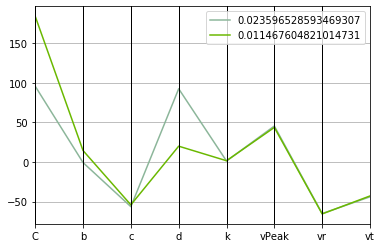

,C,a,b,c,d,k,vPeak,vr,vt
0,95.726065,0.023597,-0.755973,-56.451649,92.474689,1.213002,45.417825,-65.165883,-44.004882
1,184.074171,0.011468,14.454218,-54.128168,19.956228,1.558646,43.629241,-65.600149,-42.904657


In [14]:

nu_tests1 = list(nu_tests1.values())
nu_tests0 = list(nu_tests0.values())

mean_o_dict={}
for o0,o1 in zip(nu_tests0,nu_tests1):
    mean_o_dict[o1.name] = np.mean([o0.observation['mean'],o1.observation['mean']])*o0.observation['mean'].units
mean_o_dict    
new_tests = copy.copy(nu_tests0)

for t0 in new_tests:
    t0.observation = {}
    t0.observation['mean'] = mean_o_dict[t0.name]

mean_a_dict={}
for k,v in target0.attrs.items():
    mean_a_dict[k] = np.mean([v,target1.attrs[k]])
mean_a_dict; 


{'C': 139.9001176200584,
 'a': 0.01753206670724202,
 'b': 6.849122282364991,
 'c': -55.289908198334466,
 'd': 56.215458403210704,
 'k': 1.3858238213638587,
 'vPeak': 44.523533140232914,
 'vr': -65.38301631301397,
 'vt': -43.45476978965512}

,C,a,b,c,d,k,vPeak,vr,vt
a,95.726065,0.023597,-0.755973,-56.451649,92.474689,1.213002,45.417825,-65.165883,-44.004882
b,184.074171,0.011468,14.454218,-54.128168,19.956228,1.558646,43.629241,-65.600149,-42.904657
mean_of_a_b,139.900118,0.017532,6.849122,-55.289908,56.215458,1.385824,44.523533,-65.383016,-43.454770


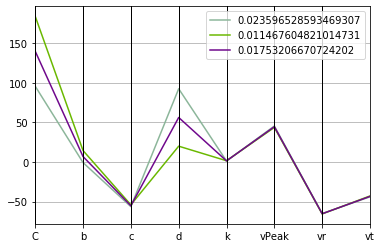

In [28]:
plt.figure()
import pandas as pd

df = pd.DataFrame([target0.attrs,target1.attrs,mean_a_dict],index=['a','b','mean_of_a_b'])
df.rename(index={'2': 'mean of 0 and 1'},inplace= True)
df


import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
first = list(df.columns)
parallel_coordinates(df,'a')
#plt.semilogy()
df

In [15]:
mean_o_dict;

In [16]:
dtc = DataTC(backend=model)
dtc.attrs = mean_a_dict
dtc.tests = new_tests
dtc.attrs
target0

In [18]:

m = dtc.dtc_to_model()

preds = OrderedDict()
for t in new_tests:
    try:
        preds[t.name] = t.generate_prediction(m)['mean']
    except:
        try:
            preds[t.name] = t.generate_prediction(m)['value']
        except:
            pass
preds
'''
for k,v in preds.items():
    if v==None:
        key = k
        #return key
        break
if key:
    preds.pop(key,None)
'''

'\nfor k,v in preds.items():\n    if v==None:\n        key = k\n        #return key\n        break\nif key:\n    preds.pop(key,None)\n'

In [19]:
'''
import numpy as np
import matplotlib.pyplot as plt


width = 0.35       
mean_o_dict = { k:mean_o_dict[k] for k in preds.keys() }
measure0 = list(mean_o_dict.values())
N = len(measure0)
ind = np.arange(N)    # the x locations for the groups

measure1 = list(preds.values())


plt.bar(ind,measure0, width)
#plt.bar(ind,measure1, width)
plt.semilogy()


plt.ylabel('Measurements')
plt.title('Measurements grouped by test')
plt.xticks(ind, (list(preds.keys())))
plt.xticks(rotation=90)
plt.show()
'''

"\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n\nwidth = 0.35       \nmean_o_dict = { k:mean_o_dict[k] for k in preds.keys() }\nmeasure0 = list(mean_o_dict.values())\nN = len(measure0)\nind = np.arange(N)    # the x locations for the groups\n\nmeasure1 = list(preds.values())\n\n\nplt.bar(ind,measure0, width)\n#plt.bar(ind,measure1, width)\nplt.semilogy()\n\n\nplt.ylabel('Measurements')\nplt.title('Measurements grouped by test')\nplt.xticks(ind, (list(preds.keys())))\nplt.xticks(rotation=90)\nplt.show()\n"

In [20]:
new_tests;

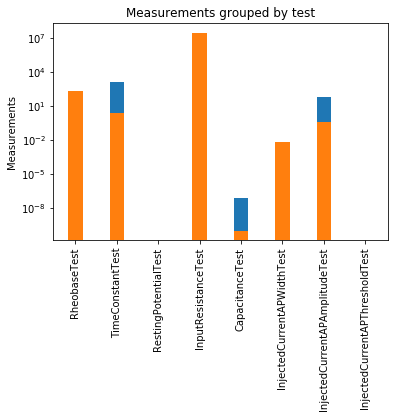

three coordinates that lead to this where


In [29]:


width = 0.35       
mean_o_dict = { k:mean_o_dict[k] for k in preds.keys() }
measure0 = list(mean_o_dict.values())
N = len(measure0)
ind = np.arange(N)    # the x locations for the groups

measure1 = list(preds.values())
#mport numpy as np
#mport matplotlib.pyplot as plt
#rom sklearn.preprocessing import StandardScaler
#caler = StandardScaler()
#caler.fit(np.array([measure0,measure1]))
#easure = scaler.transform(np.array([measure0,measure1]))
#measure0 = scaler.transform([measure0,measure1])

plt.bar(ind,measure0, width)
plt.bar(ind,measure1, width)
plt.semilogy()


plt.ylabel('Measurements')
plt.title('Measurements grouped by test')
plt.xticks(ind, (list(preds.keys())))
plt.xticks(rotation=90)
plt.show()
#measure1
#int(measure[1])
#measure[0]
print('three coordinates that lead to this where')


Depending on the random models made
Time constant test, capacitance test, and AP amplitude don't agree.

Now we can find if the reason is we created model populations with bimodal distributions in these measurements.

In [35]:

def random_p(backend,target):
    ranges = MODEL_PARAMS[backend]
    import numpy, time
    date_int = int(time.time())
    numpy.random.seed(date_int)

    random_param1 = {} # randomly sample a point in the viable parameter space.
    for k in ranges.keys():
        mean = target.attrs[k]
        var = np.var(ranges[k])
        std = np.sqrt(var)
        sample = numpy.random.normal(loc=mean, scale=std/10, size=1)[0]
        random_param1[k] = sample
    return random_param1
popa = []
popb = []
backend="IZHI"
for i in range(0,14):
    aa = random_p(backend,target0)
    dtc = DataTC(backend=backend)
    dtc.attrs = aa
    dtc.tests = nu_tests0
    dtc.self_evaluate()
    popa.append(dtc)
    
    
    bb = random_p(backend,target1)
    dtc = DataTC(backend=backend)
    dtc.attrs = bb
    dtc.tests = nu_tests0
    dtc.self_evaluate()
    popb.append(dtc)
    
all_neurons = popa 
all_neurons.extend(popb)

mean_parametersb = {}
for k,v in dtc.attrs.items():
    mean_parametersb[k] = np.mean([n.attrs[k] for n in popb])
mean_parametersb;

mean_parametersa = {}

for k,v in dtc.attrs.items():
    mean_parametersa[k] = np.mean([n.attrs[k] for n in popa])
mean_parametersa;

collect_measurements = {}
mean_parameters = {}
containers = {}
for i,tt in enumerate(dtc.tests):
    containers[tt.name] = []
    for dtc_local in all_neurons:
        dtc_local.self_evaluate()
        try:
            containers[tt.name].append(dtc_local.tests[i].prediction['value'])
        except:
            containers[tt.name].append(dtc_local.tests[i].prediction['mean'])
    collect_measurements[tt.name] =containers[tt.name]
    
    
for k,v in dtc.attrs.items():
    mean_parameters[k] = np.mean([n.attrs[k] for n in all_neurons])
    
mean_parameters;

#mean_model = dtc
mean_model = DataTC(backend=model)
#mean_model.attrs = mean_a_dict

mean_model.attrs = mean_parameters
print(mean_model)
mean_model.tests = nu_tests0
mean_model.self_evaluate()
store_mean_model_tests = {}
for t in mean_model.tests:
    try:
        print(t.name,t.prediction['mean'])
        store_mean_model_tests[t.name] = t.prediction['mean']
    except:
        print(t.name,t.prediction['value'])
        store_mean_model_tests[t.name] = t.prediction['value']
store_mean_model_tests


{'C': 103.01337465200291, 'k': 1.1258132431781898, 'vr': -66.03800908496375, 'vt': -43.890749932084375, 'vPeak': 47.93504422074863, 'a': 0.024236726776487368, 'b': -1.435774653508638, 'c': -57.16566380705174, 'd': 100.94983330180908}
time taken on block 0.0014002323150634766 
{'C': 191.36148066530924, 'k': 1.4714575385349098, 'vr': -66.47227541673227, 'vt': -42.79052526277531, 'vPeak': 46.14646067534163, 'a': 0.012107803004032794, 'b': 13.774416397162874, 'c': -54.84218294034527, 'd': 28.43137287282952}
time taken on block 0.0012638568878173828 
{'C': 103.01337465200291, 'k': 1.1258132431781898, 'vr': -66.03800908496375, 'vt': -43.890749932084375, 'vPeak': 47.93504422074863, 'a': 0.024236726776487368, 'b': -1.435774653508638, 'c': -57.16566380705174, 'd': 100.94983330180908}
time taken on block 0.0014574527740478516 
{'C': 189.60569001275655, 'k': 1.6355072704778448, 'vr': -64.56539853740806, 'vt': -44.07948966127371, 'vPeak': 45.65363988633885, 'a': 0.011029884565811153, 'b': 14.25838

{'C': 101.25758399945023, 'k': 1.2898629751211248, 'vr': -64.13113220563953, 'vt': -45.179714330582776, 'vPeak': 47.442223431745845, 'a': 0.02315880833826573, 'b': -0.9518108917116236, 'c': -56.88583393685212, 'd': 89.98941744204276}
time taken on block 0.0014116764068603516 
{'C': 99.5230555359806, 'k': 1.2087986976168732, 'vr': -65.70598948657577, 'vt': -43.97335827446877, 'vPeak': 45.768727700819, 'a': 0.023705529785843987, 'b': 0.09143018464906416, 'c': -56.82776171166449, 'd': 107.4810863214787}
time taken on block 0.0012791156768798828 
{'C': 97.74485913985178, 'k': 1.1644522581145362, 'vr': -65.34559560727902, 'vt': -44.07628995531203, 'vPeak': 45.71241350886468, 'a': 0.0212965597706268, 'b': -1.0077680180474877, 'c': -57.071487597240406, 'd': 102.18679011460277}
time taken on block 0.0012974739074707031 
{'C': 83.13919699914248, 'k': 1.187553042628679, 'vr': -63.062074340234204, 'vt': -43.77069653630409, 'vPeak': 42.98890919260216, 'a': 0.02471214733108476, 'b': -1.944226410172

{'C': 97.74485913985178, 'k': 1.1644522581145362, 'vr': -65.34559560727902, 'vt': -44.07628995531203, 'vPeak': 45.71241350886468, 'a': 0.0212965597706268, 'b': -1.0077680180474877, 'c': -57.071487597240406, 'd': 102.18679011460277}
time taken on block 0.0014717578887939453 
{'C': 83.13919699914248, 'k': 1.187553042628679, 'vr': -63.062074340234204, 'vt': -43.77069653630409, 'vPeak': 42.98890919260216, 'a': 0.02471214733108476, 'b': -1.9442264101727338, 'c': -56.292574809401344, 'd': 79.8200378114268}
time taken on block 0.001355886459350586 
{'C': 100.72430682172765, 'k': 1.3023114582968316, 'vr': -66.05643819498029, 'vt': -43.84027288657529, 'vPeak': 43.57950576342998, 'a': 0.021464552594022825, 'b': -0.2621054177956501, 'c': -56.66419026457538, 'd': 107.52983281672473}
time taken on block 0.0013267993927001953 
{'C': 85.9478669224547, 'k': 1.2728626526315656, 'vr': -64.78371839698518, 'vt': -45.19895073586314, 'vPeak': 45.81704423865123, 'a': 0.022495514778012787, 'b': -0.05653964085

{'C': 100.72430682172765, 'k': 1.3023114582968316, 'vr': -66.05643819498029, 'vt': -43.84027288657529, 'vPeak': 43.57950576342998, 'a': 0.021464552594022825, 'b': -0.2621054177956501, 'c': -56.66419026457538, 'd': 107.52983281672473}
time taken on block 0.0012905597686767578 
{'C': 85.9478669224547, 'k': 1.2728626526315656, 'vr': -64.78371839698518, 'vt': -45.19895073586314, 'vPeak': 45.81704423865123, 'a': 0.022495514778012787, 'b': -0.05653964085710139, 'c': -56.87531322013675, 'd': 90.57962002867116}
time taken on block 0.001277923583984375 
{'C': 90.20485472439364, 'k': 1.230547335338972, 'vr': -64.91276072856782, 'vt': -44.37704036585926, 'vPeak': 44.58893975019602, 'a': 0.02317625210964364, 'b': -0.43417265812683364, 'c': -56.5973549048012, 'd': 95.47711385281599}
time taken on block 0.001264333724975586 
{'C': 93.64324143032208, 'k': 1.1942486210518732, 'vr': -65.4811730600577, 'vt': -43.53585720201462, 'vPeak': 43.963707146441074, 'a': 0.024105232394699853, 'b': -1.075147092865

{'C': 90.20485472439364, 'k': 1.230547335338972, 'vr': -64.91276072856782, 'vt': -44.37704036585926, 'vPeak': 44.58893975019602, 'a': 0.02317625210964364, 'b': -0.43417265812683364, 'c': -56.5973549048012, 'd': 95.47711385281599}
time taken on block 0.0012843608856201172 
{'C': 93.64324143032208, 'k': 1.1942486210518732, 'vr': -65.4811730600577, 'vt': -43.53585720201462, 'vPeak': 43.963707146441074, 'a': 0.024105232394699853, 'b': -1.0751470928652358, 'c': -55.67499407069265, 'd': 98.50362591942435}
time taken on block 0.0013127326965332031 
{'C': 88.69683226390107, 'k': 1.2226594283123307, 'vr': -64.36611171475764, 'vt': -42.99330380446567, 'vPeak': 46.33274045764567, 'a': 0.02475572649012077, 'b': -1.4825609037238014, 'c': -57.44853501705427, 'd': 99.64504483366844}
time taken on block 0.001323699951171875 
{'C': 97.29148551718211, 'k': 1.1766239357623065, 'vr': -66.0371951653259, 'vt': -43.79241540144126, 'vPeak': 43.88559746277021, 'a': 0.023825097959625556, 'b': -0.257484800949097

{'C': 88.69683226390107, 'k': 1.2226594283123307, 'vr': -64.36611171475764, 'vt': -42.99330380446567, 'vPeak': 46.33274045764567, 'a': 0.02475572649012077, 'b': -1.4825609037238014, 'c': -57.44853501705427, 'd': 99.64504483366844}
time taken on block 0.001443624496459961 
{'C': 97.29148551718211, 'k': 1.1766239357623065, 'vr': -66.0371951653259, 'vt': -43.79241540144126, 'vPeak': 43.88559746277021, 'a': 0.023825097959625556, 'b': -0.25748480094909715, 'c': -55.608753806175535, 'd': 91.97289519001097}
time taken on block 0.0013003349304199219 
{'C': 97.29148551718211, 'k': 1.1766239357623065, 'vr': -66.0371951653259, 'vt': -43.79241540144126, 'vPeak': 43.88559746277021, 'a': 0.023825097959625556, 'b': -0.25748480094909715, 'c': -55.608753806175535, 'd': 91.97289519001097}
time taken on block 0.001306295394897461 
{'C': 84.27554192476636, 'k': 1.1589489527186176, 'vr': -67.21274052649417, 'vt': -44.88463499827018, 'vPeak': 44.60630393039846, 'a': 0.024256079415225045, 'b': -0.87288050868

{'C': 97.29148551718211, 'k': 1.1766239357623065, 'vr': -66.0371951653259, 'vt': -43.79241540144126, 'vPeak': 43.88559746277021, 'a': 0.023825097959625556, 'b': -0.25748480094909715, 'c': -55.608753806175535, 'd': 91.97289519001097}
time taken on block 0.001279592514038086 
{'C': 84.27554192476636, 'k': 1.1589489527186176, 'vr': -67.21274052649417, 'vt': -44.88463499827018, 'vPeak': 44.60630393039846, 'a': 0.024256079415225045, 'b': -0.872880508681044, 'c': -57.159445472802425, 'd': 86.5319032563919}
time taken on block 0.0013079643249511719 
{'C': 191.36148066530924, 'k': 1.4714575385349098, 'vr': -66.47227541673227, 'vt': -42.79052526277531, 'vPeak': 46.14646067534163, 'a': 0.012107803004032794, 'b': 13.774416397162874, 'c': -54.84218294034527, 'd': 28.43137287282952}
time taken on block 0.0013659000396728516 
{'C': 189.60569001275655, 'k': 1.6355072704778448, 'vr': -64.56539853740806, 'vt': -44.07948966127371, 'vPeak': 45.65363988633885, 'a': 0.011029884565811153, 'b': 14.2583801589

{'C': 191.36148066530924, 'k': 1.4714575385349098, 'vr': -66.47227541673227, 'vt': -42.79052526277531, 'vPeak': 46.14646067534163, 'a': 0.012107803004032794, 'b': 13.774416397162874, 'c': -54.84218294034527, 'd': 28.43137287282952}
time taken on block 0.0012667179107666016 
{'C': 189.60569001275655, 'k': 1.6355072704778448, 'vr': -64.56539853740806, 'vt': -44.07948966127371, 'vPeak': 45.65363988633885, 'a': 0.011029884565811153, 'b': 14.258380158959888, 'c': -54.56235307014565, 'd': 17.470957013063217}
time taken on block 0.0012753009796142578 
{'C': 187.8711615492869, 'k': 1.5544429929735932, 'vr': -66.1402558183443, 'vt': -42.87313360515971, 'vPeak': 43.980144155412, 'a': 0.01157660601338941, 'b': 15.301621235320574, 'c': -54.50428084495802, 'd': 34.96262589249914}
time taken on block 0.0014388561248779297 
{'C': 186.0929651531581, 'k': 1.5100965534712563, 'vr': -65.77986193904755, 'vt': -42.976065286002964, 'vPeak': 43.92382996345768, 'a': 0.009167635998172226, 'b': 14.2024230326240

{'C': 187.8711615492869, 'k': 1.5544429929735932, 'vr': -66.1402558183443, 'vt': -42.87313360515971, 'vPeak': 43.980144155412, 'a': 0.01157660601338941, 'b': 15.301621235320574, 'c': -54.50428084495802, 'd': 34.96262589249914}
time taken on block 0.0015439987182617188 
{'C': 186.0929651531581, 'k': 1.5100965534712563, 'vr': -65.77986193904755, 'vt': -42.976065286002964, 'vPeak': 43.92382996345768, 'a': 0.009167635998172226, 'b': 14.202423032624024, 'c': -54.74800673053393, 'd': 29.668329685623213}
time taken on block 0.0012905597686767578 
{'C': 171.4873030124488, 'k': 1.533197337985399, 'vr': -63.49634067200273, 'vt': -42.67047186699502, 'vPeak': 41.20032564719516, 'a': 0.012583223558630185, 'b': 13.265964640498778, 'c': -53.96909394269487, 'd': 7.301577382447249}
time taken on block 0.0016636848449707031 
{'C': 189.072412835034, 'k': 1.6479557536535516, 'vr': -66.49070452674881, 'vt': -42.74004821726623, 'vPeak': 41.79092221802298, 'a': 0.009335628821568251, 'b': 14.948085632875861, 

{'RheobaseTest': array(209.61914062) * pA,
 'TimeConstantTest': array(2.56156199) * ms,
 'RestingPotentialTest': array(-65.61214832) * mV,
 'InputResistanceTest': array(26667384.31705511) * kg*m**2/(s**3*A**2),
 'CapacitanceTest': array(9.60559896e-11) * s**4*A**2/(kg*m**2),
 'InjectedCurrentAPWidthTest': array(0.00051) * s,
 'InjectedCurrentAPAmplitudeTest': array(65.0806171) * mV,
 'InjectedCurrentAPThresholdTest': array(-20.70241217) * mV}

# Finally confirm there are bimodal and unimodal distributions

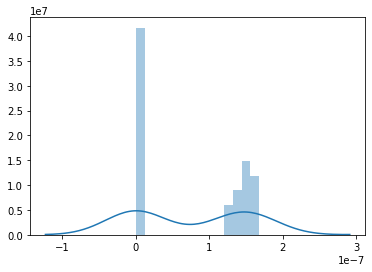

In [62]:
collect_measurements;
bins2 = int(len(collect_measurements["InjectedCurrentAPAmplitudeTest"])/2)

import seaborn as sns
sns.distplot(collect_measurements["CapacitanceTest"],bins=bins2)

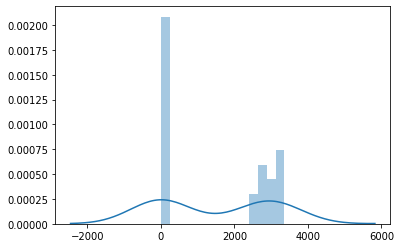

In [63]:
collect_measurements;

import seaborn as sns
sns.distplot(collect_measurements["TimeConstantTest"],bins=bins2)

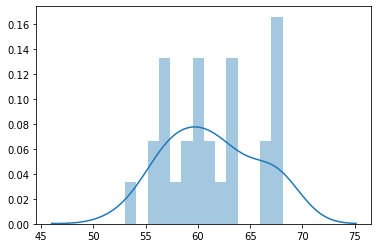

In [64]:
collect_measurements;

import seaborn as sns

sns.distplot(collect_measurements["InjectedCurrentAPAmplitudeTest"],bins=bins2)

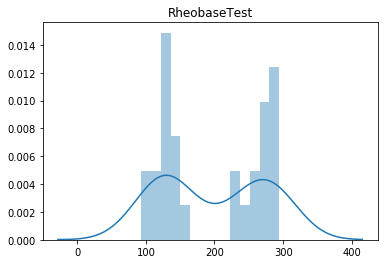

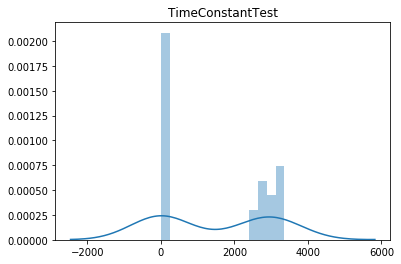

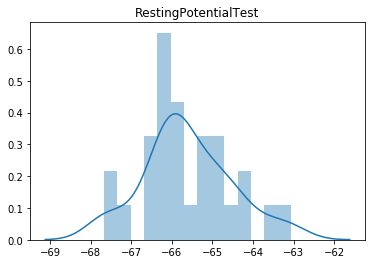

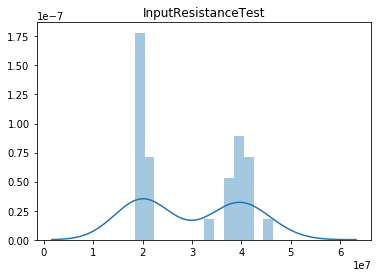

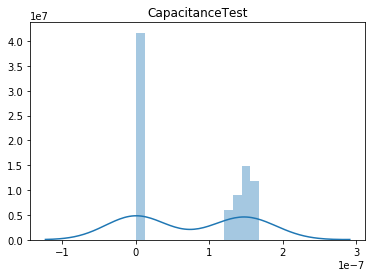

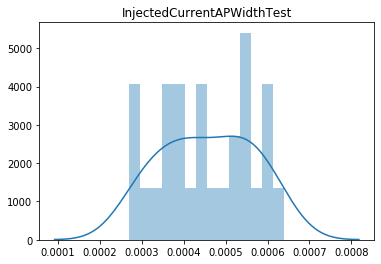

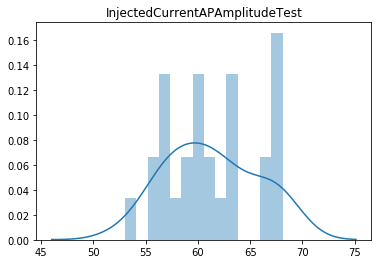

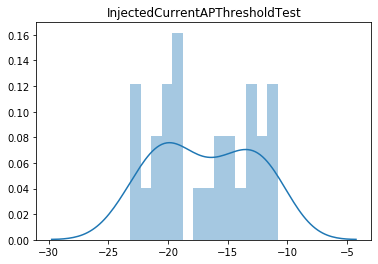

In [65]:
collect_measurements;

import seaborn as sns
for k in collect_measurements.keys():
    fig = plt.figure()

    plt.clf()
    plt.title(k)
    sns.distplot(collect_measurements[k],bins=bins2)

In [66]:
mean_o_dict;



width = 0.35       # the width of the bars: can also be len(x) sequence

measure0 = list(mean_o_dict.values())
N = len(measure0)
ind = np.arange(N)    # the x locations for the groups

measure1 = list(preds.values())


plt.bar(1,mean_o_dict['InputResistanceTest'], 1)
plt.bar(1,preds['InputResistanceTest'], 1)
#plt.semilogy()


plt.ylabel('InputResistanceTest')
plt.title('InputResistanceTest grouped by test')

preds.pop("InputResistanceTest",None)
mean_o_dict.pop("InputResistanceTest",None)

#plt.xticks(ind, (list(preds.keys())))
#plt.xticks(rotation=90)
plt.show()

KeyError: 'InputResistanceTest'

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


width = 0.35       # the width of the bars: can also be len(x) sequence

measure0 = list(mean_o_dict.values())
N = len(measure0)
ind = np.arange(N)    # the x locations for the groups

measure1 = list(preds.values())


plt.bar(1,mean_o_dict['TimeConstantTest'], 1)
plt.bar(1,preds['TimeConstantTest'], 1)
#plt.semilogy()


plt.ylabel('TimeConstantTest')
plt.title('TimeConstantTest grouped by test')

preds.pop("TimeConstantTest",None)
mean_o_dict.pop("TimeConstantTest",None)

#plt.xticks(ind, (list(preds.keys())))
#plt.xticks(rotation=90)
plt.show()

import scipy
tStat, pValue =  scipy.stats.ttest_1samp(a, popmean, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

In [ ]:
mean_o_dict;

import numpy as np
import matplotlib.pyplot as plt


width = 0.35       # the width of the bars: can also be len(x) sequence

measure0 = list(mean_o_dict.values())
N = len(measure0)
ind = np.arange(N)    # the x locations for the groups

measure1 = list(preds.values())


plt.bar(1,mean_o_dict['InjectedCurrentAPAmplitudeTest'], 1)
plt.bar(1,preds['InjectedCurrentAPAmplitudeTest'], 1)
#plt.semilogy()


plt.ylabel('InjectedCurrentAPAmplitudeTest')
plt.title('InjectedCurrentAPAmplitudeTest grouped by test')

preds.pop("InjectedCurrentAPAmplitudeTest",None)
mean_o_dict.pop("InjectedCurrentAPAmplitudeTest",None)

#plt.xticks(ind, (list(preds.keys())))
#plt.xticks(rotation=90)
plt.show()
measure1

In [ ]:
#plt.bar(range(0,len(measure1)),measure1, width)
#plt.semilogy()
plt.plot(range(0,len(measure1)),measure1)
plt.plot(range(0,len(measure0)),measure0)


plt.ylabel('Measurements')
plt.title('Measurements grouped by test')
plt.xticks(ind, (list(preds.keys())))
plt.xticks(rotation=90)
plt.show()
measure1

In [ ]:







def initialise_test(v,rheobase):
    v = switch_logic([v])
    v = v[0]
    k = v.name
    if not hasattr(v,'params'):
        v.params = {}
    if not 'injected_square_current' in v.params.keys():    
        v.params['injected_square_current'] = {}
    if v.passive == False and v.active == True:
        keyed = v.params['injected_square_current']
        v.params = active_values(keyed,rheobase)
        v.params['injected_square_current']['delay'] = DELAY
        v.params['injected_square_current']['duration'] = DURATION
    if v.passive == True and v.active == False:

        v.params['injected_square_current']['amplitude'] =  -10*pq.pA
        v.params['injected_square_current']['delay'] = PASSIVE_DELAY
        v.params['injected_square_current']['duration'] = PASSIVE_DURATION

    if v.name in str('RestingPotentialTest'):
        v.params['injected_square_current']['delay'] = PASSIVE_DELAY
        v.params['injected_square_current']['duration'] = PASSIVE_DURATION
        v.params['injected_square_current']['amplitude'] = 0.0*pq.pA    
        
    return v

class NUFeature(object):
    def __init__(self,test,model):
        self.test = test
        self.model = model
    def calculate_score(self,responses):
        model = responses['model'].dtc_to_model()
        model.attrs = responses['params']
        
        ##
        # Last 4 lines entered
        ##
        if responses['rheobase'] is None:
            return 100.0
        if type(responses['rheobase']) is type(dict()):
            if responses['rheobase']['value'] is None:
                return 100.0
        self.test = initialise_test(self.test,responses['rheobase'])
        #if "RestingPotential" in str(self.test.name):            
        #    print(self.test.observation,self.test.prediction)
        if "Rheobase" in str(self.test.name):
            prediction = {'value':responses['rheobase']}

            score_gene = self.test.compute_score(self.test.observation,prediction)
            try:

                lns = np.abs(score_gene.log_norm_score)
            except:
                # works 1/2 time that log_norm_score does not work
                # more informative than nominal bad score 100
                #lns = float(score_gene.raw)

                lns = np.abs(float(score_gene.raw))
            return lns

        else:
            try:
                score_gene = self.test.judge(model)
            except:
                return 100.0

        if not isinstance(type(score_gene),type(None)):
            if not isinstance(score_gene,sciunit.scores.InsufficientDataScore):
                if not isinstance(type(score_gene.log_norm_score),type(None)):
                    try:

                        lns = np.abs(score_gene.log_norm_score)
                    except:
                        # works 1/2 time that log_norm_score does not work
                        # more informative than nominal bad score 100
                        s
                else:
                    # works 1/2 time that log_norm_score does not work
                    # more informative than nominal bad score 100

                    lns = np.abs(score_gene.raw)
            else:
                prediction = self.test.generate_prediction(model)
                lns = 100
        if lns==np.inf:
            

            lns = float(score_gene.raw)
        return lns

    
objectives = []
#for protocol in sweep_protocols:
#    stim_start = protocol.stimuli[0].step_delay
#    stim_end = stim_start + protocol.stimuli[0].step_duration
    
for tt in nu_tests:
    feature_name = '%s.%s' % (tt.name, tt.name)
    ft = NUFeature(tt,model)
    objective = ephys.objectives.SingletonObjective(
        feature_name,
        ft)
    objectives.append(objective)

score_calc = ephys.objectivescalculators.ObjectivesCalculator(objectives) 
        
        
#objectives[0]        



# ### Creating the cell evaluator
# 
# We will need an object that can use these objective definitions to calculate the scores from a protocol response. This is called a ScoreCalculator.




lop={}
from bluepyopt.parameters import Parameter
for k,v in MODEL_PARAMS["IZHI"].items():
    p = Parameter(name=k,bounds=v,frozen=False)
    lop[k] = p

print(lop)
simple_cell.params = lop

nu_tests[0].judge(simple_cell)

nu_tests[0].score_type = ZScore


# Combining everything together we have a CellEvaluator. The CellEvaluator constructor has a field 'parameter_names' which contains the (ordered) list of names of the parameters that are used as input (and will be fitted later on).
sweep_protocols = []
for protocol_name, amplitude in [('step1', 0.05)]:

    protocol = ephys.protocols.SweepProtocol(protocol_name, [None], [None])
    sweep_protocols.append(protocol)
twostep_protocol = ephys.protocols.SequenceProtocol('twostep', protocols=sweep_protocols)

MODEL_PARAMS["IZHI"]
cell_evaluator = ephys.evaluators.CellEvaluator(
        cell_model=simple_cell,
        param_names=MODEL_PARAMS["IZHI"].keys(),
        fitness_protocols={twostep_protocol.name: twostep_protocol},
        fitness_calculator=score_calc,
        sim='euler')
simple_cell.params_by_names(MODEL_PARAMS["IZHI"].keys())
simple_cell.params;


# ### Evaluating the cell
# 
# The cell can now be evaluate for a certain set of parameter values.

# In[ ]:


#default_params = MODEL_PARAMS["IZHI"]
#print(cell_evaluator.evaluate_with_dicts())


# ## Setting up and running an optimisation
# 
# Now that we have a cell template and an evaluator for this cell, we can set up an optimisation.
import dask
def dask_map_function(eval_,invalid_ind):
    results = []
    for x in invalid_ind:
        y = dask.delayed(eval_)(x)
        results.append(y)
    fitnesses = dask.compute(*results)
    return fitnesses



MU =100
optimisation = bpop.optimisations.DEAPOptimisation(
        evaluator=cell_evaluator,
        offspring_size = MU,
        map_function = dask_map_function,
        selector_name='IBEA',
        mutpb=0.05,
        cxpb=0.4)


# And this optimisation can be run for a certain number of generations



final_pop, hall_of_fame, logs, hist = optimisation.run(max_ngen=100)



In [ ]:


# The optimisation has return us 4 objects: final population, hall of fame, statistical logs and history. 
# 
# The final population contains a list of tuples, with each tuple representing the two parameters of the model


print('Final population: ', final_pop)


# The best individual found during the optimisation is the first individual of the hall of fame

best_ind = hall_of_fame[0]
print('Best individual: ', best_ind)
print('Fitness values: ', best_ind.fitness.values)


# We can evaluate this individual and make use of a convenience function of the cell evaluator to return us a dict of the parameters


best_ind_dict = cell_evaluator.param_dict(best_ind)
print(cell_evaluator.evaluate_with_dicts(best_ind_dict))


model = cell_evaluator.cell_model
cell_evaluator.param_dict(best_ind)
model.attrs = {str(k):float(v) for k,v in cell_evaluator.param_dict(best_ind).items()}



opt = model.model_to_dtc()
opt.attrs = {str(k):float(v) for k,v in cell_evaluator.param_dict(best_ind).items()}

check_binary_match(target,opt)
inject_and_plot_passive_model(opt,second=target)


# As you can see the evaluation returns the same values as the fitness values provided by the optimisation output. 
# We can have a look at the responses now.

# In[ ]:


#plot_responses(twostep_protocol.run(cell_model=simple_cell, param_values=best_ind_dict, sim=nrn))
 


# Let's have a look at the optimisation statistics.
# We can plot the minimal score (sum of all objective scores) found in every optimisation. 
# The optimisation algorithm uses negative fitness scores, so we actually have to look at the maximum values log.

gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
plt.plot(gen_numbers, min_fitness, label='min fitness')
plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1) 
plt.ylim(0.9*min(min_fitness), 1.1 * max(min_fitness)) 

In [ ]:
gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')

plt.clf()
plt.plot(gen_numbers, max_fitness, label='max fitness')
plt.plot(gen_numbers, avg_fitness, label='avg fitness')
plt.plot(gen_numbers, min_fitness, label='min fitness')

plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.yscale('log')

plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1) 
#plt.ylim(0.9*min(min_fitness), 1.1 * max(min_fitness)) 
plt.show()

In [ ]:
gen_numbers = logs.select('gen')
min_fitness = logs.select('min')
max_fitness = logs.select('max')
avg_fitness = logs.select('avg')

plt.clf()
fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(1,1)

plt.plot(gen_numbers, min_fitness, label='min fitness')
#ax.semilogy()
#ax.set_yscale('log')
plt.yscale('log')

plt.xlabel('generation #')
plt.ylabel('score (# std)')
plt.legend()
plt.xlim(min(gen_numbers) - 1, max(gen_numbers) + 1) 
#plt.ylim(0.9*min(min_fitness), 1.1 * max(min_fitness)) 
plt.show()

In [ ]:
inject_and_plot_passive_model(opt,second=target,plotly=False)

In [ ]:
check_binary_match(opt,target,plotly=False,snippets=False)
check_binary_match(opt,target,plotly=False,snippets=True)

In [ ]:
best_ind_dict = cell_evaluator.param_dict(best_ind)
objectives = cell_evaluator.evaluate_with_dicts(best_ind_dict)

In [ ]:
objectives

In [ ]:
opt = dtc_to_rheo(opt)
print(opt.rheobase)

In [ ]:
target.rheobase

In [ ]:
params = {}
params['injected_square_current'] = {}
#if v.name in str('RestingPotentialTest'):
params['injected_square_current']['delay'] = PASSIVE_DELAY
params['injected_square_current']['duration'] = PASSIVE_DURATION
params['injected_square_current']['amplitude'] = 0.0*pq.pA    

In [ ]:

opt_model = opt.dtc_to_model()
opt_model.inject_square_current(params)
opt_vm = opt_model.get_membrane_potential()
opt_vm[-1]

In [ ]:
target_model = target.dtc_to_model()
target_model.inject_square_current(params)
target_vm = target_model.get_membrane_potential()
target_vm[-1]

In [ ]:
best_ind = hall_of_fame[1]
print('Best individual: ', best_ind)
print('Fitness values: ', best_ind.fitness.values)


# We can evaluate this individual and make use of a convenience function of the cell evaluator to return us a dict of the parameters


best_ind_dict = cell_evaluator.param_dict(best_ind)
print(cell_evaluator.evaluate_with_dicts(best_ind_dict))


model = cell_evaluator.cell_model
dtc= model.model_to_dtc()
opt = dtc_to_rheo(opt)
print(opt.rheobase)

In [ ]:
#model.rheobase

In [ ]:
len(hist.genealogy_history)/20

In [ ]:
import pandas as pd
import seaborn as sns
logbook = logs
#scores = [ m for m in logs ]
'''
list_of_dicts = []
df1 = pd.DataFrame()
genes=[]
for _,v in hist.genealogy_history.items():
    genes.append(v.fitness.values)
for j,i in enumerate(objectives.keys()):
    index = i.split('.')[0]
    df1[str(index)] = pd.Series(genes).values[j]#, index=df1.index)

'''
MU =20
genes=[]
min_per_generations = []
for i,v in hist.genealogy_history.items():
    if i%25==0:
        min_per_gen = sorted([(gene,np.min(gene)) for gene in genes],key=lambda x: x[1])
        min_per_generations.append(min_per_gen[0][0])
        genes =[]
    genes.append(v.fitness.values)
df2 = pd.DataFrame()
scores = []
for j,i in enumerate(objectives.keys()):
    index = i.split('.')[0]
    if j<len(min_per_generations):
        df2[index] = pd.Series(min_per_generations).values[j]#, index=df1.index)
        #scores.append(df2[str(i)])
df2    

#rescored = [np.sum(i) for i in range(0,len(scores)) ]
#rescored

In [ ]:
import math
import seaborn as sns
sns.set(style="darkgrid")

fig,axes = plt.subplots(3,3,figsize=(20,20))#math.ceil(len(objectives)/2+1),figsize=(20,20))
axes[0,0].plot(gen_numbers, min_fitness, label='min fitness')

axes[0,0].set_title('Observation/Prediction Disagreement')
for i,c in enumerate(df2.columns):
    ax = axes.flat[i+1]
    history = df2[c]
    #mn = mean[k.name] 
    #st = std[k.name] 
    #history = [(j[i]-mn)/st for j in scores ]
    #ax.axhline(y=mn , xmin=0.02, xmax=0.99,color='red',label='best candidate sampled')

    #ax.axvline(x=min_x , ymin=0.02, ymax=0.99,color='blue',label='best candidate sampled')
    ax.plot(history)
    ax.set_title(str(c))
    #bigger = np.max([np.max(history),mn])
    #smaller = np.max([np.min(history),mn])

    #ax.set_ylim([np.min(history),np.max(history)])
    #ax.set_ylabel(str(front[0].dtc.tests[i].observation['std'].units))
axes[0,0].set_xlabel("Generation")
axes[0,0].set_ylabel("standardized error")

plt.tight_layout()
#if figname is not None:
#    plt.savefig(figname)
#else:
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
logbook = logs
#scores = [ m for m in logs ]
list_of_dicts = []
df1 = pd.DataFrame()
genes=[]
for _,v in hist.genealogy_history.items():
    genes.append(v.fitness.values)
for j,i in enumerate(objectives.keys()):
    index = i.split('.')[0]
    df1[str(index)] = pd.Series(genes).values[j]#, index=df1.index)

df1=(df1-df1.mean())/df1.std()

corr = df1.corr()
fig =plt.figure(figsize=(10,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)#, annot=True)
plt.show()


In [ ]:
print(np.sum(np.sum(corr)))